In [ ]:
import sys, os, pathlib

sys.path.append('..')

from nca_trainer import NCA_Trainer, prepare_img, SamplePool
from Automata.models.NCA import NCAModule
from torchenhanced.util import showTens
from torch.optim import Adam, SGD

target = prepare_img('images/whale.png',tarsize=48)
showTens(target)

model = NCAModule(n_states=16,n_hidden=64)

optimizer = Adam(model.parameters(), lr=2e-3)

trainer = NCA_Trainer(model=model, tar_image=target, optim=optimizer,run_name='whale', device='cuda',save_loc='runs')

In [ ]:
if(os.path.exists('runs\\NCANew\\state\\whale.state')):
    trainer.load_state('runs\\NCANew\\state\\whale.state')
trainer.train_steps(20000, batch_size=128, save_every=1000, step_log=300)

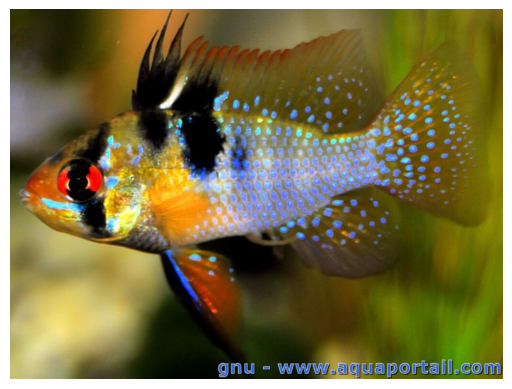

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


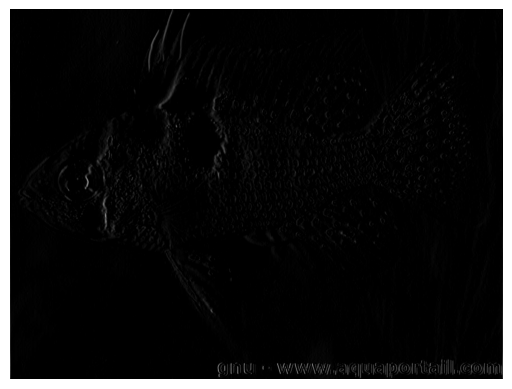

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


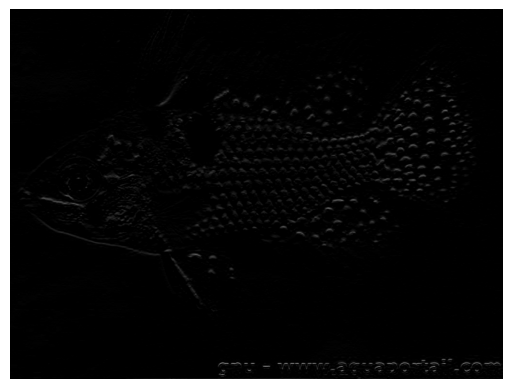

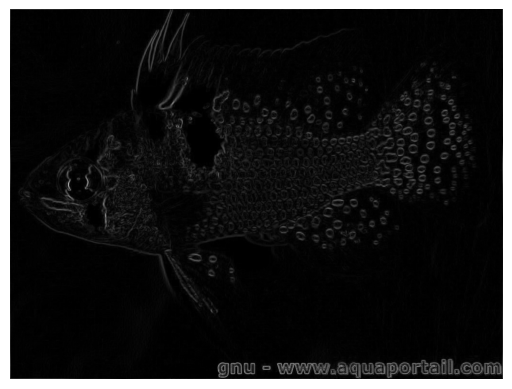

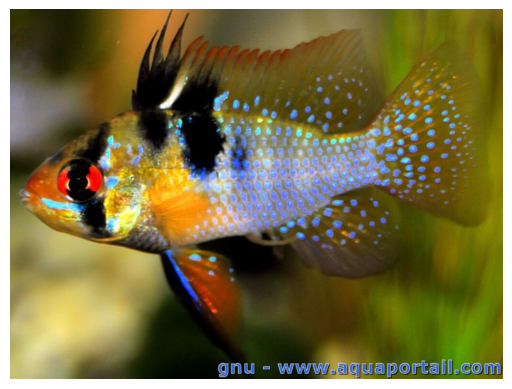

In [12]:
import sys, os, pathlib
from nca_trainer import NCA_Trainer, prepare_img, SamplePool
from torchenhanced.util import showTens

sys.path.append('..')
from Automata.models.NCA import CABlock

sobeler= CABlock(n_states=4)

target = prepare_img('ramirezi.jpg', tarsize=(768,1024),pad=0)[None]
sobelbro = prepare_img('sobel.png',tarsize= (421,915), pad=0)[None]
showTens(target)

def showsobel (img):
    sobelx,sobely,x = sobeler(img).split(4,dim=1) # (1,3*3,768,1024)

    sobelx = sobelx[:,:3].mean(dim=1,keepdim=True).expand(-1,3,-1,-1)*2
    sobely = sobely[:,:3].mean(dim=1,keepdim=True).expand(-1,3,-1,-1)*2

    sobeltot = (sobelx**2 + sobely**2).sqrt()
    showTens(sobelx)
    showTens(sobely)
    showTens(sobeltot)
    showTens(x)

showsobel(target)
showsobel(sobelbro)


In [ ]:
import sys, os, pathlib

sys.path.append('..')

from nca_trainer import NCA_Trainer, prepare_img, SamplePool
from Automata.models.NCA import NCAModule
from torchenhanced.util import showTens, saveTensImage
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import MultiStepLR

RUN_NAME = 'betta' # Name of the run, for saving/loading and logging
IMG_PATH = 'images/betta.png' # Relative path to the image to train on
TARGET_SIZE = (40,40) # Size of the target image (will be resized to this)
FRAMES = 64 # Number of frames to evolve the NCA before evaluation
target = prepare_img(IMG_PATH,tarsize=TARGET_SIZE, pad=8)
from torchvision.utils import save_image
save_image(target,'downbetta.png')
# saveTensImage(target,'.','downbetta')